# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Transformation of dependent variable y before performing Feature Scaling

In [5]:
y = y.reshape(len(y),1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [8]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [10]:
y = y.flatten()

# Training The model In SVR

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

SVR()

In [12]:
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


In [13]:
y = y.reshape(len(y),1)

In [14]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# y_pred = sc_y.inverse_transform([regressor.predict(sc_x.transform([[6.5]]))])
# note that regressor.predict(sc_x.transform([[6.5]])) returns a 1-D array and when we use this input to sc_y.transform(1-D array) i got an an error which was different from the code shown  to me in the lecture 
## very very Important point

In [15]:
y_pred = sc_y.inverse_transform([regressor.predict(sc_x.transform([[6.5]]))])

In [16]:
print(y_pred)

[[170370.0204065]]


# Visualizing the SVR result

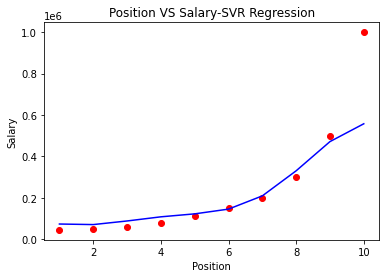

In [17]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform([regressor.predict(x)]).reshape(len(sc_x.inverse_transform(x)),1),color = 'blue')
plt.title('Position VS Salary-SVR Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [18]:
print(sc_x.inverse_transform(x))
print(sc_y.inverse_transform(x))
print(sc_y.inverse_transform([regressor.predict(x)]).reshape(len(sc_x.inverse_transform(x)),1))

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[-195459.7274933 ]
 [ -96579.78805034]
 [   2300.15139261]
 [ 101180.09083557]
 [ 200060.03027852]
 [ 298939.96972148]
 [ 397819.90916443]
 [ 496699.84860739]
 [ 595579.78805034]
 [ 694459.7274933 ]]
[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


# Note that: plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform([regressor.predict(x)
# ]).reshape(len(sc_x.inverse_transform(x)),1),color = 'blue')
# previous error  returned x as dimension (10,1) and y has a dimension of (1,10)
# hence i had to change it dimension of similar to x by using reshape(len(sc_x.inverse_transform(x)),1) which is not mentioned in the lecture

# *****************************************************************

# Visualize the SVR results for higher resolution and smoother curve

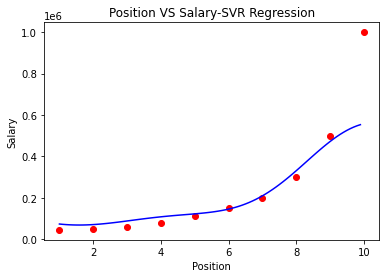

In [19]:
x_grid = np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform([regressor.predict(sc_x.transform(x_grid))]).reshape(len(sc_x.inverse_transform(x_grid)),1),color = 'blue')
plt.title('Position VS Salary-SVR Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [36]:
y_pred = sc_y.inverse_transform([regressor.predict(x)]).reshape(len(sc_x.inverse_transform(x)),1)
y = sc_y.inverse_transform(y).reshape(len(sc_x.inverse_transform(y)),1)

In [37]:
print(y_pred)
print(y)

[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))

ValueError: continuous is not supported

In [39]:
clf.score(y, y_pred)

NameError: name 'clf' is not defined